<a href="https://colab.research.google.com/github/YashKerkar211/Data-Science-Programs/blob/main/Case%20Studies/Iris/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Data engineering
import pandas as pd
df=pd.read_csv("Iris.csv")

#Preparing X and Y

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(X)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [48]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


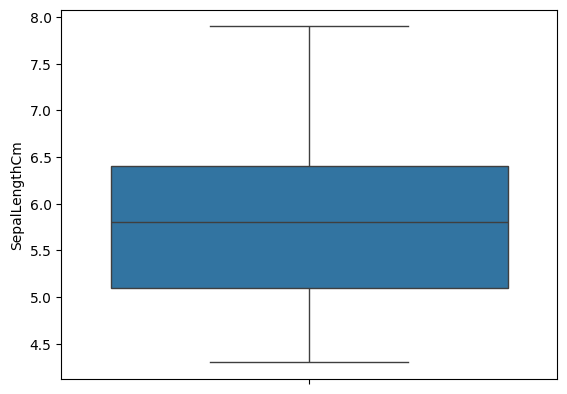

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()

In [50]:
#Dealing with Outliers using Interquantile Range
print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64
1.3000000000000007
8.350000000000001
3.1499999999999986
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64


In [51]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder
df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

In [52]:
print(df)

      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]


In [53]:
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [54]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [55]:
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

In [56]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs      Score
0  SepalLengthCm  54.648649
1   SepalWidthCm  20.864407
2  PetalLengthCm  91.123288
3   PetalWidthCm  92.890411


[0.06943775 0.02372569 0.34927892 0.55755764]


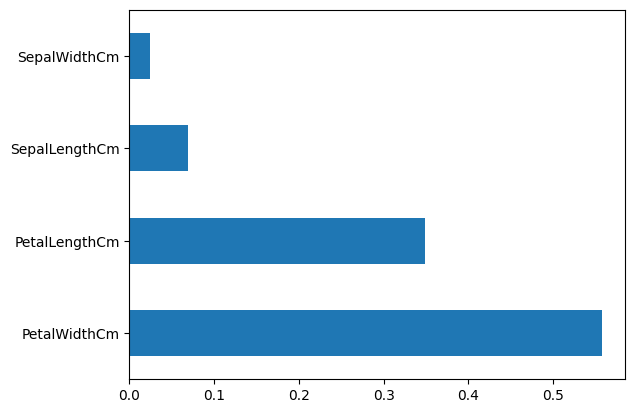

In [57]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [58]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.31321774  1.20402635]
 [-1.31321774  1.20402635]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.31321774  1.20402635]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
df=pd.read_csv("Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [62]:
x = df.drop('Id', axis=1)
x = x.drop('Species', axis=1)
y = df['Species']  # Target value

In [63]:
print("Features:\n")
print(x)

print("Target\n")
print(y)

Features:

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
Target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-vir

In [64]:
print("Splitting the data:\n")
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)
print("Training data of x:\n",X_train)
print("Testing data of x:\n",X_test)
print("Training data of y:\n",y_train)
print("Testing data of y \n",y_test)

Splitting the data:

Training data of x:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
118            7.7           2.6            6.9           2.3
18             5.7           3.8            1.7           0.3
4              5.0           3.6            1.4           0.2
45             4.8           3.0            1.4           0.3
59             5.2           2.7            3.9           1.4
..             ...           ...            ...           ...
133            6.3           2.8            5.1           1.5
137            6.4           3.1            5.5           1.8
72             6.3           2.5            4.9           1.5
140            6.7           3.1            5.6           2.4
37             4.9           3.1            1.5           0.1

[105 rows x 4 columns]
Testing data of x:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
14             5.8           4.0            1.2           0.2
98             5.1           2.5            3.

In [65]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
#predicting
print("Model Predicting:\n")
y_pred=logr.predict(X_test)

Model Predicting:



In [67]:
print("Coefficients:\n",logr.coef_)
print("Intercepts:\n",logr.intercept_)

Coefficients:
 [[-0.43370837  0.75087537 -2.24663518 -0.93746626]
 [ 0.58146568 -0.53175541 -0.12942375 -0.79361366]
 [-0.14775731 -0.21911996  2.37605893  1.73107992]]
Intercepts:
 [  9.22114071   1.7003866  -10.92152732]


In [68]:
# 6. Gradient Boosting:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=10)

df=pd.read_csv("Iris.csv")
print(df)

x = df.drop('Id', axis=1)
x = x.drop('Species', axis=1)
y = df['Species']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.2)

gbm.fit(X_train,Y_train)

y_pred=gbm.predict(X_test)

print("GBM: ",accuracy_score(Y_test,y_pred))
print("Classification_report:\n",classification_report(Y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(Y_test,y_pred))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv("Iris.csv")

In [71]:
#Preparing X and Y

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

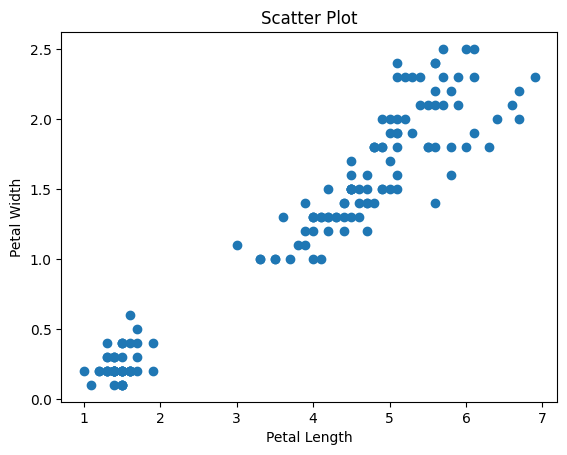

In [72]:
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.title("Scatter Plot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

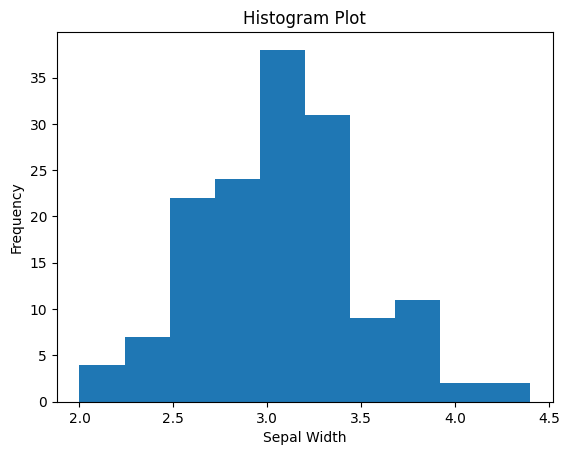

In [73]:
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["SepalWidthCm"])
plt.title("Histogram Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()

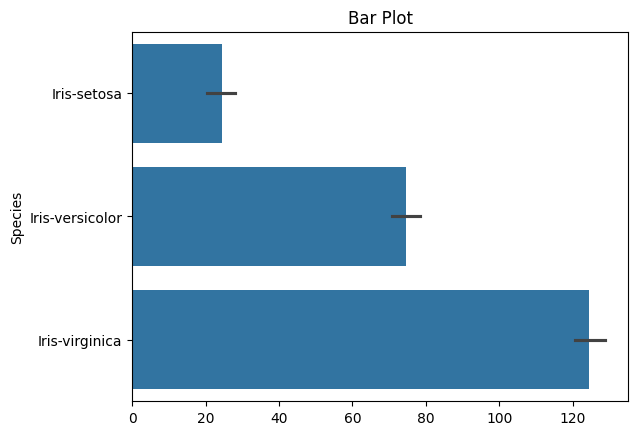

In [75]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(df["Species"])
plt.title("Bar Plot")
plt.show()

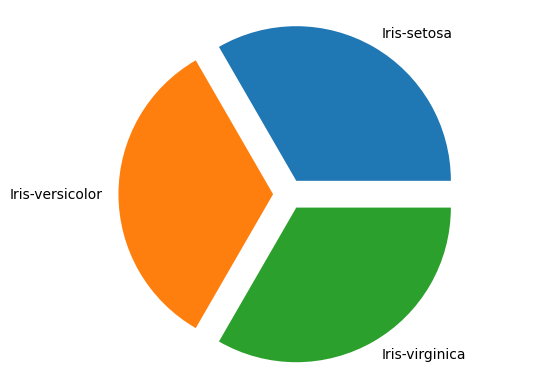

In [76]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal') # without this piechart may appear stretch or compressed, that's why it is used
plt.show()

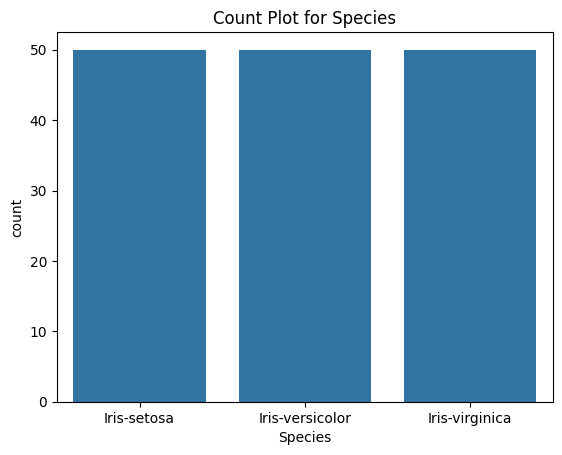

In [77]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Species', data = df)
plt.title("Count Plot for Species")
plt.show()

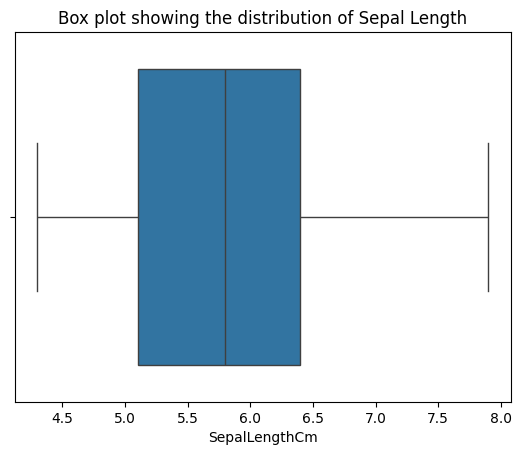

In [78]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='SepalLengthCm', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()

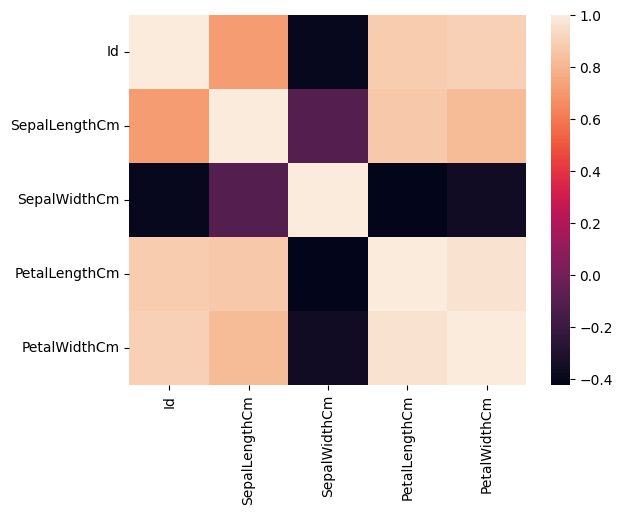

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr())
plt.show()